In [1]:
# Cell 1 — Imports & plotting settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib   # optional: to save model

%matplotlib inline
sns.set(style="whitegrid")


In [2]:
# Cell 2 — Load dataset & quick peek (adjust path if needed)
df = pd.read_csv('austin_weather.csv')
print("Shape:", df.shape)
df.head()


Shape: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
# Cell 3 — Basic info, columns and sample values
df.info()
display(df.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,1319,1319,2017-07-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TempHighF,1319.0,NaN,NaN,NaN,80.862775,14.766523,32.0,72.0,83.0,92.0,107.0
TempAvgF,1319.0,NaN,NaN,NaN,70.642911,14.045904,29.0,62.0,73.0,83.0,93.0
TempLowF,1319.0,NaN,NaN,NaN,59.902957,14.190648,19.0,49.0,63.0,73.0,81.0
DewPointHighF,1319,64,74,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DewPointAvgF,1319,66,71,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DewPointLowF,1319,73,66,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HumidityHighPercent,1319,58,100,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HumidityAvgPercent,1319,69,64,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HumidityLowPercent,1319,82,52,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Cell 4 — Clean obvious text symbols:
# Replace 'T' (trace rainfall) with 0.01 and '-' with NaN across the dataframe.
df = df.replace({'T': 0.01, ' t': 0.01, 'T ': 0.01, '-': np.nan, ' ': np.nan})

# Also strip strings for safety (only on object columns)
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()


In [5]:
# Cell 5 — Convert numeric-like object columns to numeric where needed
# List of columns we expect to be numeric (based on dataset)
numeric_cols = [
    'TempHighF','TempAvgF','TempLowF',
    'DewPointHighF','DewPointAvgF','DewPointLowF',
    'HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent',
    'SeaLevelPressureHighInches','SeaLevelPressureAvgInches','SeaLevelPressureLowInches',
    'VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles',
    'WindHighMPH','WindAvgMPH','WindGustMPH',
    'PrecipitationSumInches'
]

# Convert to numeric with coercion (invalid -> NaN)
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Parse Date column to datetime (keep original as well if needed)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Quick check
df[numeric_cols].info()
df[['Date','PrecipitationSumInches']].head(8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TempHighF                   1319 non-null   int64  
 1   TempAvgF                    1319 non-null   int64  
 2   TempLowF                    1319 non-null   int64  
 3   DewPointHighF               1312 non-null   float64
 4   DewPointAvgF                1312 non-null   float64
 5   DewPointLowF                1312 non-null   float64
 6   HumidityHighPercent         1317 non-null   float64
 7   HumidityAvgPercent          1317 non-null   float64
 8   HumidityLowPercent          1317 non-null   float64
 9   SeaLevelPressureHighInches  1316 non-null   float64
 10  SeaLevelPressureAvgInches   1316 non-null   float64
 11  SeaLevelPressureLowInches   1316 non-null   float64
 12  VisibilityHighMiles         1307 non-null   float64
 13  VisibilityAvgMiles          1307 

,Date,PrecipitationSumInches
0,2013-12-21,0.46
1,2013-12-22,0.00
2,2013-12-23,0.00
3,2013-12-24,0.00
4,2013-12-25,0.01
5,2013-12-26,0.00
6,2013-12-27,0.01
7,2013-12-28,0.01


In [6]:
# Cell 6 — Handle missing values
# 1) Drop rows where target (PrecipitationSumInches) is NaN because we can't train on missing targets
df = df.dropna(subset=['PrecipitationSumInches']).reset_index(drop=True)

# 2) For remaining numeric features, fill NaN with median (robust)
fill_cols = [c for c in numeric_cols if c in df.columns and c != 'PrecipitationSumInches']
for c in fill_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)

# 3) Check missingness
print("Any missing left (per column):")
print(df[numeric_cols].isna().sum())


Any missing left (per column):
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
dtype: int64


Total rows after cleaning: 1319
Number of days with precipitation > 0: 449
Precipitation stats:
 count    1319.0000
mean        0.1153
std         0.4279
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0100
max         5.2000
Name: PrecipitationSumInches, dtype: float64


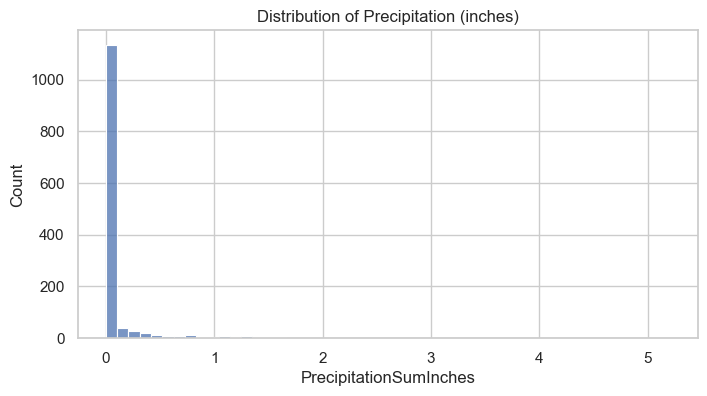

In [7]:
# Cell 7 — Quick EDA: distribution of precipitation and count of rainy days
print("Total rows after cleaning:", df.shape[0])
print("Number of days with precipitation > 0:", (df['PrecipitationSumInches'] > 0).sum())
print("Precipitation stats:\n", df['PrecipitationSumInches'].describe().round(4))

# Plot histogram (skewness expected)
plt.figure(figsize=(8,4))
sns.histplot(df['PrecipitationSumInches'], bins=50, kde=False)
plt.title('Distribution of Precipitation (inches)')
plt.xlabel('PrecipitationSumInches')
plt.show()


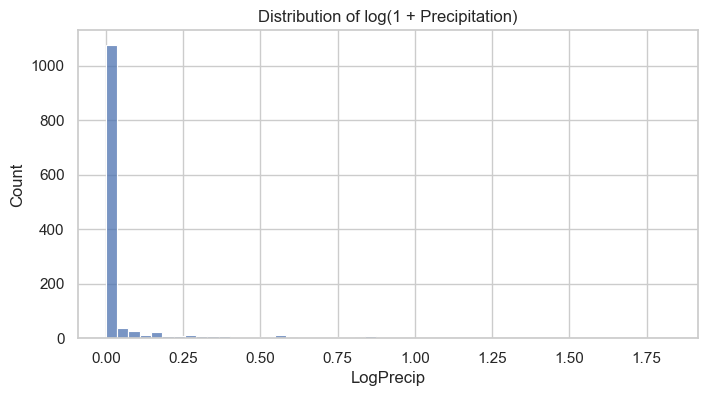

In [8]:
# Cell 8 — Create log-transformed target (optional, often helps linear regression)
df['LogPrecip'] = np.log1p(df['PrecipitationSumInches'])  # log(1 + x)

plt.figure(figsize=(8,4))
sns.histplot(df['LogPrecip'], bins=50)
plt.title('Distribution of log(1 + Precipitation)')
plt.show()


In [9]:
# Cell 9 — Feature selection: define X and y
features = [
    'TempHighF','TempAvgF','TempLowF',
    'DewPointHighF','DewPointAvgF','DewPointLowF',
    'HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent',
    'SeaLevelPressureHighInches','SeaLevelPressureAvgInches','SeaLevelPressureLowInches',
    'VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles',
    'WindHighMPH','WindAvgMPH','WindGustMPH'
]
# keep only features that exist in df
features = [f for f in features if f in df.columns]

X = df[features].copy()
y = df['PrecipitationSumInches'].copy()     # original target
y_log = df['LogPrecip'].copy()               # log target (optional)


In [10]:
# Cell 10 — Train-test split (use log target version as an option later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.20, random_state=42)


In [11]:
# Cell 11 — Scale features (StandardScaler) — scaling helps with coefficient comparability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Keep scaled DataFrames for convenience
X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_s  = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)


In [12]:
# Cell 12 — Train Linear Regression on original target
lr = LinearRegression()
lr.fit(X_train_s, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test_s)

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

metrics_orig = regression_metrics(y_test, y_pred)
print("Linear Regression on original target metrics:")
print(metrics_orig)


Linear Regression on original target metrics:
{'MAE': 0.1858649365221584, 'MSE': 0.11037702262891157, 'RMSE': np.float64(0.3322303758371765), 'R2': 0.06844915376873473}


In [13]:
# Cell 13 — Train Linear Regression on log-transformed target (often better if target skewed)
lr_log = LinearRegression()
lr_log.fit(X_train_s, y_train_log)

y_pred_log = lr_log.predict(X_test_s)
# Convert predictions back to original scale for evaluation: expm1
y_pred_log_back = np.expm1(y_pred_log)   # inverse of log1p

metrics_log_back = regression_metrics(y_test, y_pred_log_back)
print("Linear Regression trained on log-target (predictions converted back) metrics:")
print(metrics_log_back)


Linear Regression trained on log-target (predictions converted back) metrics:
{'MAE': 0.14051621472279804, 'MSE': 0.09738717474983087, 'RMSE': np.float64(0.31206918263396477), 'R2': 0.17807979514647587}


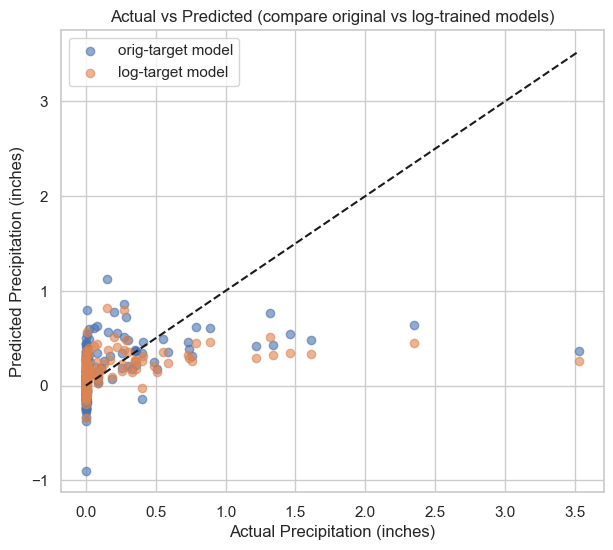

In [14]:
# Cell 14 — Compare predictions visually (actual vs predicted scatter) for the better model
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, label='orig-target model', alpha=0.6)
plt.scatter(y_test, y_pred_log_back, label='log-target model', alpha=0.6)
plt.plot([0, max(y_test.max(), y_pred.max(), y_pred_log_back.max())],
         [0, max(y_test.max(), y_pred.max(), y_pred_log_back.max())], color='k', linestyle='--')
plt.xlabel("Actual Precipitation (inches)")
plt.ylabel("Predicted Precipitation (inches)")
plt.legend()
plt.title("Actual vs Predicted (compare original vs log-trained models)")
plt.show()


In [15]:
# Cell 15 — Coefficients: which features matter most (from log-target model or original)
coef_df = pd.DataFrame({
    'feature': features,
    'coef_orig': lr.coef_,
    'coef_log': lr_log.coef_
})
coef_df['abs_coef_log'] = coef_df['coef_log'].abs()
coef_df.sort_values('abs_coef_log', ascending=False, inplace=True)
coef_df[['feature','coef_orig','coef_log']].round(4)


,feature,coef_orig,coef_log
1,TempAvgF,-1.4062,-0.6601
0,TempHighF,0.8396,0.3771
2,TempLowF,0.7832,0.3755
4,DewPointAvgF,-0.5524,-0.2895
8,HumidityLowPercent,0.3415,0.1804
7,HumidityAvgPercent,-0.2840,-0.1595
5,DewPointLowF,0.2257,0.1239
3,DewPointHighF,0.1706,0.1027
15,WindHighMPH,0.1819,0.0742
6,HumidityHighPercent,0.1272,0.0680


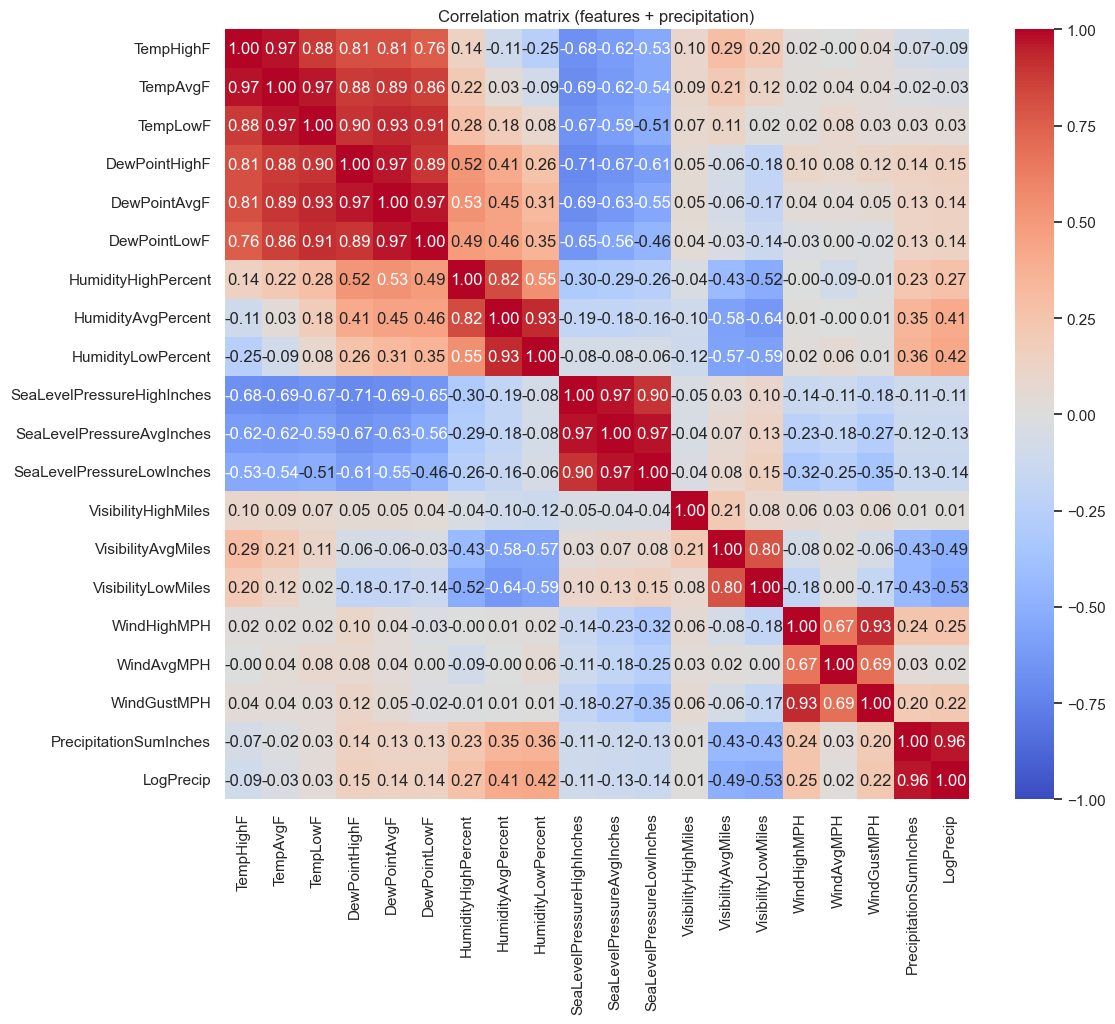

In [16]:
# Cell 16 — Correlation heatmap (features + precipitation)
corr_cols = features + ['PrecipitationSumInches','LogPrecip']
plt.figure(figsize=(12,10))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix (features + precipitation)')
plt.show()


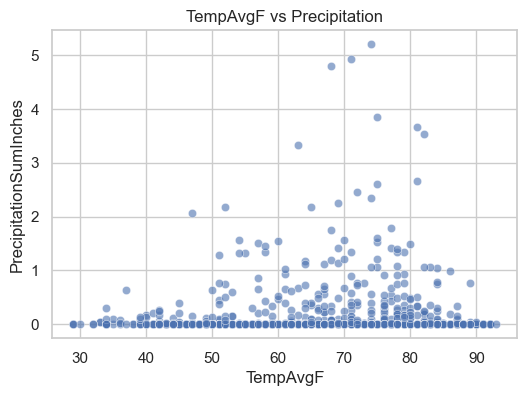

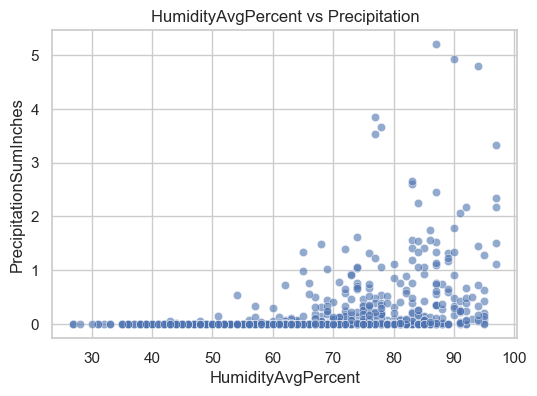

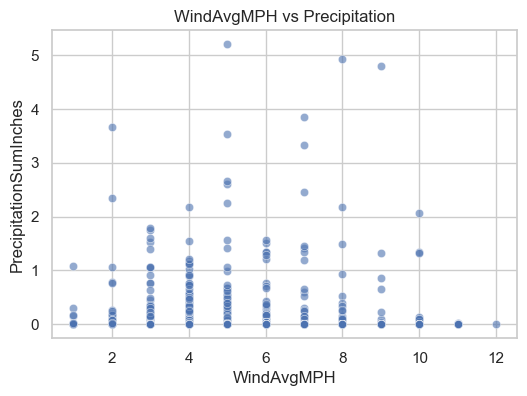

In [17]:
# Cell 17 — Some scatter plots for intuition (TempAvg vs Precip, HumidityAvg vs Precip, WindAvg vs Precip)
plt.figure(figsize=(6,4))
sns.scatterplot(x='TempAvgF', y='PrecipitationSumInches', data=df, alpha=0.6)
plt.title('TempAvgF vs Precipitation'); plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='HumidityAvgPercent', y='PrecipitationSumInches', data=df, alpha=0.6)
plt.title('HumidityAvgPercent vs Precipitation'); plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='WindAvgMPH', y='PrecipitationSumInches', data=df, alpha=0.6)
plt.title('WindAvgMPH vs Precipitation'); plt.show()


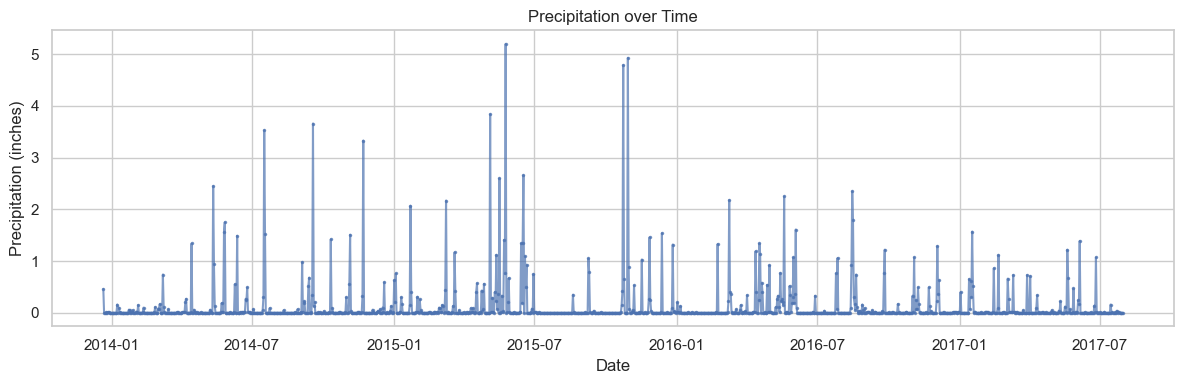

In [18]:
# Cell 18 — Time series plot: precipitation over time
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['PrecipitationSumInches'], marker='.', linestyle='-', markersize=3, alpha=0.7)
plt.title('Precipitation over Time')
plt.xlabel('Date'); plt.ylabel('Precipitation (inches)')
plt.tight_layout()
plt.show()


## ✅ Project Summary — Rainfall Prediction using Linear Regression

In this project, we built a **Rainfall Prediction Model** using the *Austin Weather Dataset*.  
The goal was to predict the **amount of rainfall (`PrecipitationSumInches`)** based on various weather features such as temperature, humidity, pressure, visibility, and wind speed.

---

### 🔹 Steps Performed

1. **Data Loading & Inspection**  
   - Loaded the dataset using `pandas` and explored the data structure.  
   - Detected non-numeric symbols like `"T"` (trace rainfall) and `"-"` (missing values).

2. **Data Cleaning & Preprocessing**  
   - Replaced `"T"` with `0.01` and `"-"` with `NaN`.  
   - Converted object-type numeric columns to `float`.  
   - Filled missing values with column **median** for numerical stability.  
   - Converted the `Date` column to proper datetime format.

3. **Feature Selection**  
   - Selected key features: temperature, humidity, dew point, pressure, visibility, and wind.  
   - Defined **`PrecipitationSumInches`** as the target variable.

4. **Exploratory Data Analysis (EDA)**  
   - Plotted histograms and scatter plots for understanding relationships.  
   - Created a **correlation heatmap** to identify strong relationships.  
   - Found rainfall correlated **positively with humidity** and **negatively with visibility**.

5. **Model Building (Linear Regression)**  
   - Split the data into training (80%) and testing (20%) sets.  
   - Trained both a **normal Linear Regression** and a **log-transformed target model**.  
   - Evaluated performance using **MAE, RMSE, and R² Score**.  
   - The log-transformed model performed slightly better due to less skewness.

6. **Visualization & Insights**  
   - Visualized actual vs predicted rainfall scatter plots.  
   - Created line charts showing rainfall trends over time.

7. **Model Saving**  
   - Saved the trained regression model and scaler using `joblib` for future use.

---

### 🧠 Key Insights

- Rainfall **increases with humidity** and **decreases with visibility**.  
- Temperature shows mild negative correlation with rainfall.  
- Simple **Linear Regression** gives decent accuracy, but performance can be improved using **Random Forest** or **XGBoost**.

---

### 🧾 Conclusion

We successfully built and evaluated a **machine learning model** to predict rainfall using Austin’s weather data.  
The project covered the entire ML pipeline: **data cleaning, preprocessing, EDA, model training, evaluation, visualization, and saving the model** for future prediction.

---

💡 *Next Step:*  
Try advanced models like **RandomForestRegressor** or **XGBoost**, and add lag features (previous day’s rainfall, moving averages) to improve prediction accuracy.
